imported
loaded


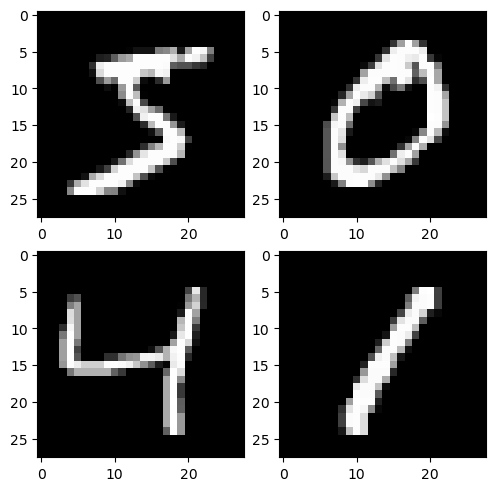

In [1]:
from glio.importsall import *
from glio.datasets import MNIST
print('imported')
dstrain, dstest = MNIST.get_mnist_classification()
print('loaded')
dstrain.preview()

In [2]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = ConvBlock(1, 16, 4, 1, act=nn.ReLU(), pool=nn.MaxPool2d(2,2))
        self.c2 = ConvBlock(16, 32, 3, 1, act=nn.ReLU(), pool=nn.MaxPool2d(2, 2))
        self.c3 = ConvBlock(32, 64, 2, 1, act=nn.ReLU(), pool=nn.MaxPool2d(2, 2))
        self.linear = LinearBlock(64*3*3, 10, act=nn.Softmax(dim=1), flatten=True)
    
    def forward(self,x):
        x = self.c1(x)
        x = self.c2(x)
        x = self.c3(x)
        x = self.linear(x)
        return x


print(f'{count_parameters(CNN()) = }')
gsummary(CNN(), (1, 1, 28,28))

count_parameters(CNN()) = 18938
path                                         module                                       input size               output size              params    buffers   
__main__.CNN/c1/0                            torch.nn.modules.conv.Conv2d                 (1, 1, 28, 28)           (1, 16, 29, 29)          272       0         
__main__.CNN/c1/1                            torchzero.nn.layers.crop.SpatialReduceCrop   (1, 16, 29, 29)          (1, 16, 28, 28)          0         0         
__main__.CNN/c1/2                            torch.nn.modules.pooling.MaxPool2d           (1, 16, 28, 28)          (1, 16, 14, 14)          0         0         
__main__.CNN/c1/3                            torch.nn.modules.activation.ReLU             (1, 16, 14, 14)          (1, 16, 14, 14)          0         0         
__main__.CNN/c2/0                            torch.nn.modules.conv.Conv2d                 (1, 16, 14, 14)          (1, 32, 14, 14)          4640      0         
__

# 1e-1
unstable

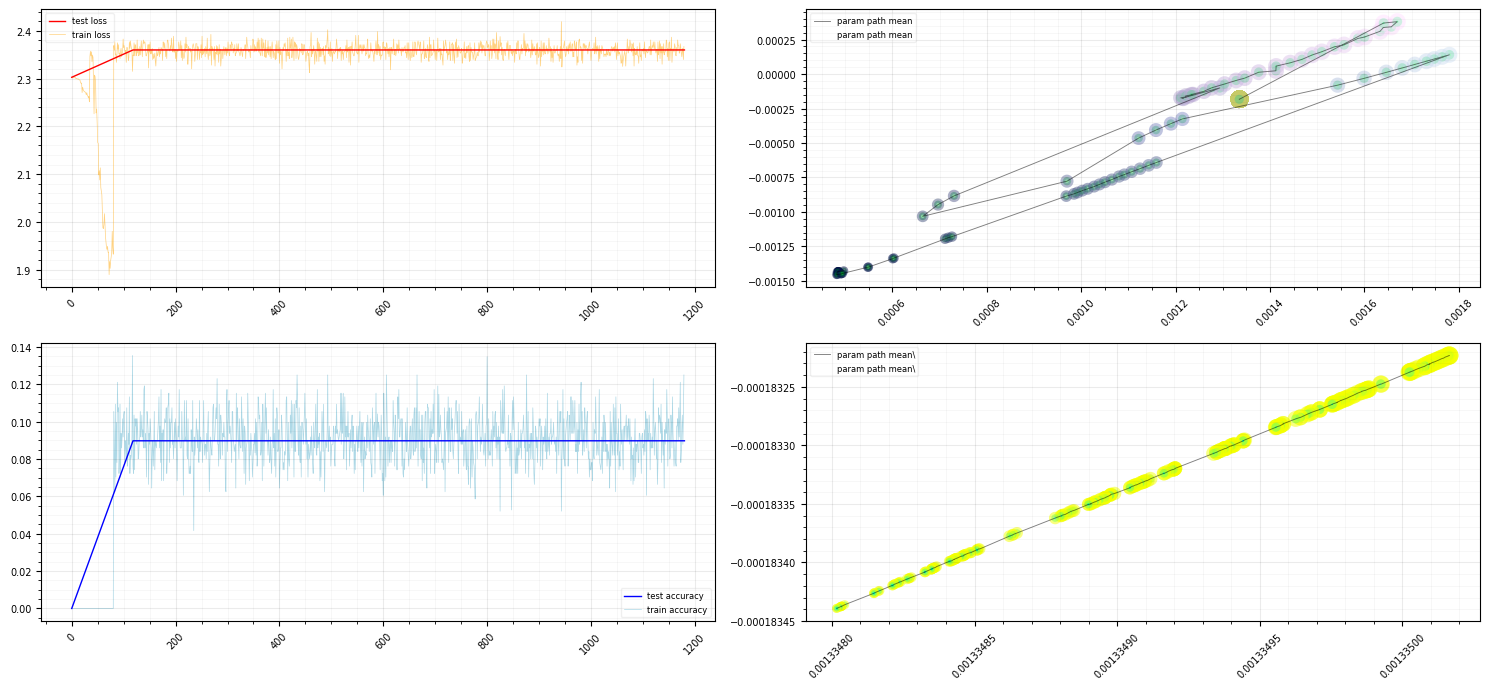

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉     | 10/10 | 9.38s/ops, elapsed: 01m:24s, rem: 9.38s | 

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉  | 20/20 | 86.36ops/s, elapsed: 220ms, rem: 12ms | 
train loss:                              last = 2.367, min = 1.889, max = 2.419
test loss:                               last = 2.360, min = 2.303, max = 2.360
train accuracy:                          last = 0.125, min = 0.000, max = 0.135
test accuracy:                           last = 0.090, min = 0.000, max = 0.090

| metric | n | min | max | first | last |
| :- | :- | :- | :- | :- | :- |
| grad std | 1180 | 0.0000 | 0.0117 | 0.0002 | 0.0000 |
| grad-update angle | 1180 | 0.7728 | 2.3172 | 1.4829 | 1.5566 |
| grad-update mean | 1180 | 0.0000 | 0.0073 | 0.0001 | 0.0000 |
| last grads mean | 1179 | 0.0000 | 0.0058 | 0.0001 | 0.0000 |
| last updates std | 1179 | 0.0000 | 0.0168 | 0.0002 | 0.0000 |
| param max | 1180 | 0.2475 | 0.3900 | 0.2485 | 0.3900 |
| param mean | 1180 | 0.0001 | 0.0019 | 0.0001 | 0.0014 |
| param min | 1180 | -0.2842 | -0.2478 | -0.2494 | -0.2842 |
| param var | 1180 | 0.0022 | 0.0029 | 0.0022 | 0.0029 |
| train accuracy | 1180 | 0.0000 | 0.1354 | 0.0000 | 0.1250 |
| test accuracy | 11 | 0.0000 | 0.0898 | 0.0000 | 0.0898 |
| test accuracy max | 11 | 0.0000 | 0.1113 | 0.0000 | 0.1113 |
| test accuracy median | 11 | 0.0000 | 0.0928 | 0.0000 | 0.0928 |
| test accuracy min | 11 | 0.0000 | 0.0723 | 0.0000 | 0.0723 |
| train loss | 1180 | 1.8894 | 2.4195 | 2.3031 | 2.3674 |
| test loss | 11 | 2.3029 | 2.3602 | 2.3029 | 2.3602 |
| test loss max | 11 | 2.3032 | 2.3791 | 2.3032 | 2.3791 |
| test loss median | 11 | 2.3029 | 2.3596 | 2.3029 | 2.3596 |
| test loss min | 11 | 2.3026 | 2.3440 | 2.3026 | 2.3440 |
| time | 1180 | 1.7569 | 89.8433 | 1.7569 | 89.8433 |
| update angle | 1180 | 0.0000 | 0.3495 | 0.0004 | 0.0000 |
| update var | 1180 | 0.0000 | 0.0003 | 0.0000 | 0.0000 |


In [3]:
from torchzero.optim.first_order.gradient_direction_curvature import QuadraticGDC
with seeded_rng(): MODEL = CNN()
LR = 1e-1
MAGN = None
BATCH_SIZE = 512
N_EPOCHS = 10
LOSS_FN = nn.CrossEntropyLoss()
METRIC_STEP = 1

with seeded_rng():
    DLTRAIN = DataLoader(dstrain, BATCH_SIZE, shuffle=True, **seed0_kwargs)
    DLTEST = DataLoader(dstest, BATCH_SIZE, shuffle=False, **seed0_kwargs)

OPT = QuadraticGDC(MODEL.parameters(), lr = LR, debug=True)
#SCHED = lr_scheduler.CosineAnnealingLR(OPT, N_EPOCHS)
SCHED = None

CALLBACKS = (LogLossCB(),

            SaveForwardChannelImagesCB(dstest[0][0].unsqueeze(0)),
            MetricAccuracyCB(),
            LogParamDistCB(METRIC_STEP),
            LogParamPathCB(METRIC_STEP),
            LogUpdateDistCB(METRIC_STEP),
            LogUpdatePathCB(METRIC_STEP),
            LogLastUpdatesAngleCB(METRIC_STEP),
            LogGradDistCB(METRIC_STEP),
            LogGradUpdateAngleCB(METRIC_STEP),
            LogGradPathCB(METRIC_STEP),
            LogLastGradsAngleCB(METRIC_STEP),
            LogTimeCB(),
            #LogLRCB(),
            #LogOptimizerParamCB('magn'),
            DisplayLoggerTableCB(),
            AccelerateCB("no"),
            PerformanceTweaksCB(True),
            SaveLastCB(),
            LivePlotCB(1000, plot_keys = ("4plotsplot","10metrics01"),path_keys=("4plotspath250",)),
            SimpleProgressBarCB(),
            OneBatchClosureCB(),
            #GradientFreeWithZeroGradCB(),
            #OneBatchClosureWithNoBackwardCB(),
)
clean_mem()

# MODEL = gnn.LSUV(MODEL, DLTRAIN, max_iter=5)

LEARNER_NAME = f"RandomOptimizer lr{LR:.0e} magn{LR:.0e}"
learner = Learner(MODEL, LEARNER_NAME, CALLBACKS, loss_fn=LOSS_FN, optimizer=OPT, scheduler=SCHED, )
learner.fit(N_EPOCHS, DLTRAIN, DLTEST,test_on_interrupt=False)

# 1e-2
not enough

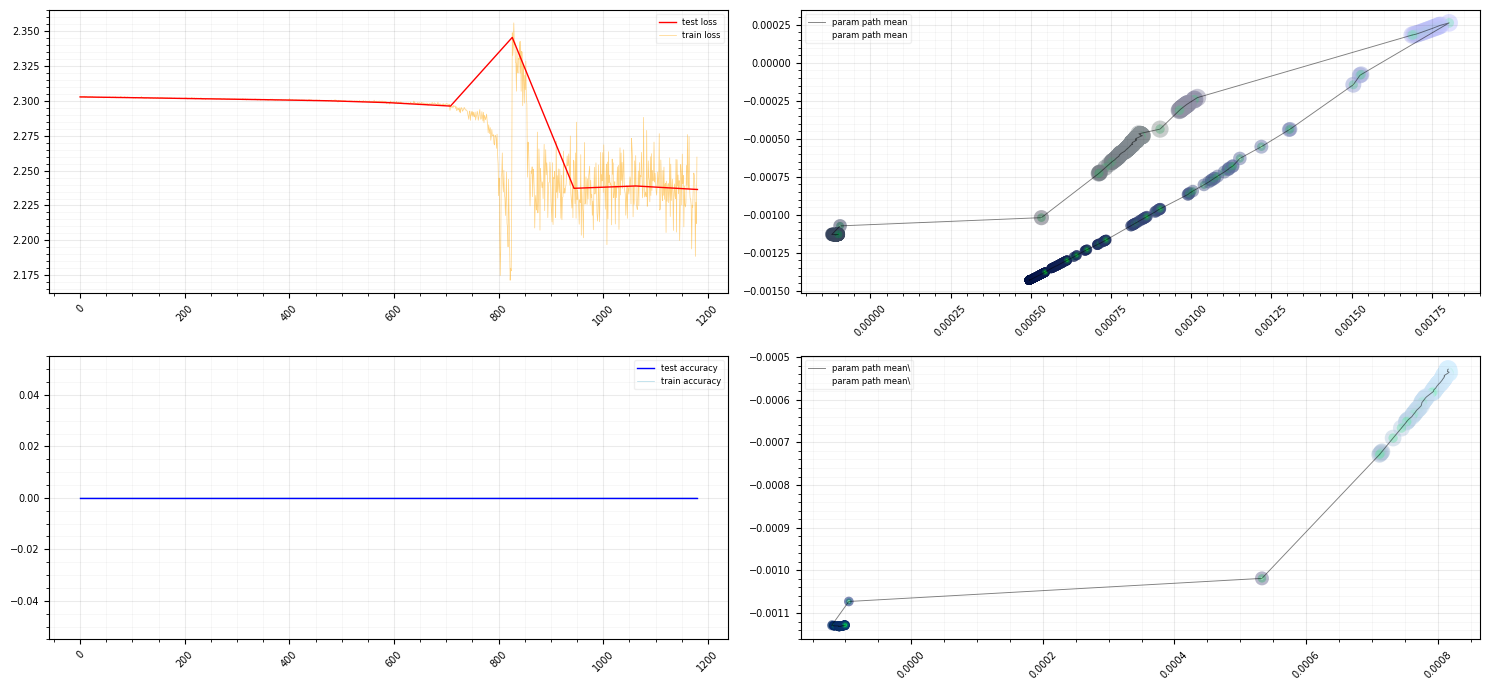

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉     | 10/10 | 9.17s/ops, elapsed: 01m:22s, rem: 9.17s | 

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉  | 20/20 | 60.28ops/s, elapsed: 315ms, rem: 17ms | 
train loss:                              last = 2.260, min = 2.171, max = 2.356
test loss:                               last = 2.239, min = 2.237, max = 2.346
train accuracy:                          last = 0.000, min = 0.000, max = 0.000
test accuracy:                           last = 0.000, min = 0.000, max = 0.000

| metric | n | min | max | first | last |
| :- | :- | :- | :- | :- | :- |
| grad std | 1180 | 0.0001 | 0.0073 | 0.0002 | 0.0005 |
| grad-update angle | 1180 | 1.0683 | 2.3403 | 1.4829 | 1.6332 |
| grad-update mean | 1180 | 0.0001 | 0.0034 | 0.0001 | 0.0002 |
| last grads mean | 1179 | 0.0000 | 0.0026 | 0.0001 | 0.0002 |
| last updates std | 1179 | 0.0000 | 0.0085 | 0.0000 | 0.0000 |
| param max | 1180 | 0.2476 | 0.3264 | 0.2485 | 0.3197 |
| param mean | 1180 | 0.0001 | 0.0017 | 0.0001 | 0.0004 |
| param min | 1180 | -0.2504 | -0.2468 | -0.2494 | -0.2489 |
| param var | 1180 | 0.0022 | 0.0025 | 0.0022 | 0.0025 |
| train accuracy | 1180 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |
| test accuracy | 11 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |
| test accuracy max | 11 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |
| test accuracy median | 11 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |
| test accuracy min | 11 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |
| train loss | 1180 | 2.1713 | 2.3560 | 2.3032 | 2.2597 |
| test loss | 11 | 2.2365 | 2.3456 | 2.3029 | 2.2365 |
| test loss max | 11 | 2.2596 | 2.3583 | 2.3032 | 2.2596 |
| test loss median | 11 | 2.2373 | 2.3457 | 2.3029 | 2.2374 |
| test loss min | 11 | 2.2160 | 2.3240 | 2.3026 | 2.2160 |
| time | 1180 | 2.3391 | 90.2184 | 2.3391 | 90.2184 |
| update angle | 1180 | 0.0000 | 0.1880 | 0.0000 | 0.0001 |
| update var | 1180 | 0.0000 | 0.0001 | 0.0000 | 0.0000 |


In [3]:
from torchzero.optim.first_order.gradient_direction_curvature import QuadraticGDC
with seeded_rng(): MODEL = CNN()
LR = 1e-2
MAGN = None
BATCH_SIZE = 512
N_EPOCHS = 10
LOSS_FN = nn.CrossEntropyLoss()
METRIC_STEP = 1

with seeded_rng():
    DLTRAIN = DataLoader(dstrain, BATCH_SIZE, shuffle=True, **seed0_kwargs)
    DLTEST = DataLoader(dstest, BATCH_SIZE, shuffle=False, **seed0_kwargs)

OPT = QuadraticGDC(MODEL.parameters(), lr = LR, debug=True)
#SCHED = lr_scheduler.CosineAnnealingLR(OPT, N_EPOCHS)
SCHED = None

CALLBACKS = (LogLossCB(),

            SaveForwardChannelImagesCB(dstest[0][0].unsqueeze(0)),
            MetricAccuracyCB(),
            LogParamDistCB(METRIC_STEP),
            LogParamPathCB(METRIC_STEP),
            LogUpdateDistCB(METRIC_STEP),
            LogUpdatePathCB(METRIC_STEP),
            LogLastUpdatesAngleCB(METRIC_STEP),
            LogGradDistCB(METRIC_STEP),
            LogGradUpdateAngleCB(METRIC_STEP),
            LogGradPathCB(METRIC_STEP),
            LogLastGradsAngleCB(METRIC_STEP),
            LogTimeCB(),
            #LogLRCB(),
            #LogOptimizerParamCB('magn'),
            DisplayLoggerTableCB(),
            AccelerateCB("no"),
            PerformanceTweaksCB(True),
            SaveLastCB(),
            LivePlotCB(1000, plot_keys = ("4plotsplot","10metrics01"),path_keys=("4plotspath250",)),
            SimpleProgressBarCB(),
            OneBatchClosureCB(),
            #GradientFreeWithZeroGradCB(),
            #OneBatchClosureWithNoBackwardCB(),
)
clean_mem()

# MODEL = gnn.LSUV(MODEL, DLTRAIN, max_iter=5)

LEARNER_NAME = f"RandomOptimizer lr{LR:.0e} magn{LR:.0e}"
learner = Learner(MODEL, LEARNER_NAME, CALLBACKS, loss_fn=LOSS_FN, optimizer=OPT, scheduler=SCHED, )
learner.fit(N_EPOCHS, DLTRAIN, DLTEST,test_on_interrupt=False)

# 1
1

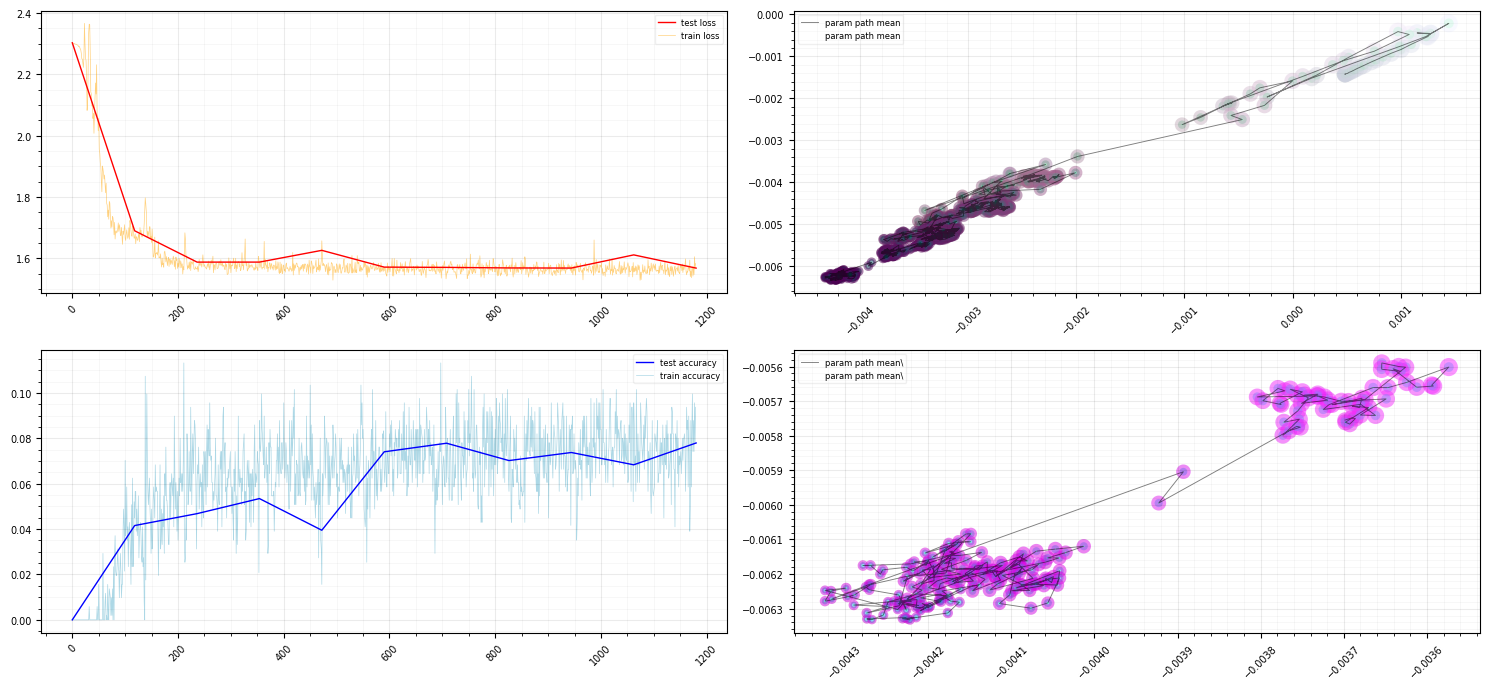

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉     | 10/10 | 9.02s/ops, elapsed: 01m:21s, rem: 9.02s | 

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉  | 20/20 | 63.84ops/s, elapsed: 298ms, rem: 16ms | 
train loss:                              last = 1.583, min = 1.528, max = 2.366
test loss:                               last = 1.611, min = 1.568, max = 2.303
train accuracy:                          last = 0.094, min = 0.000, max = 0.113
test accuracy:                           last = 0.068, min = 0.000, max = 0.078

| metric | n | min | max | first | last |
| :- | :- | :- | :- | :- | :- |
| grad std | 1180 | 0.0002 | 0.0112 | 0.0002 | 0.0003 |
| grad-update angle | 1180 | 0.7274 | 2.5126 | 1.5850 | 1.5061 |
| grad-update mean | 1180 | 0.0001 | 0.0044 | 0.0001 | 0.0001 |
| last grads mean | 1179 | 0.0001 | 0.0067 | 0.0001 | 0.0003 |
| last updates std | 1179 | 0.0001 | 0.0112 | 0.0001 | 0.0003 |
| param max | 1180 | 0.2478 | 0.5772 | 0.2480 | 0.5765 |
| param mean | 1180 | -0.0047 | 0.0013 | 0.0001 | -0.0045 |
| param min | 1180 | -0.5462 | -0.2474 | -0.2491 | -0.5402 |
| param var | 1180 | 0.0022 | 0.0062 | 0.0022 | 0.0062 |
| train accuracy | 1180 | 0.0000 | 0.1133 | 0.0000 | 0.0938 |
| test accuracy | 11 | 0.0000 | 0.0780 | 0.0000 | 0.0780 |
| test accuracy max | 11 | 0.0000 | 0.1113 | 0.0000 | 0.1074 |
| test accuracy median | 11 | 0.0000 | 0.0742 | 0.0000 | 0.0742 |
| test accuracy min | 11 | 0.0000 | 0.0478 | 0.0000 | 0.0441 |
| train loss | 1180 | 1.5283 | 2.3663 | 2.3023 | 1.5827 |
| test loss | 11 | 1.5679 | 2.3029 | 2.3029 | 1.5679 |
| test loss max | 11 | 1.6124 | 2.3032 | 2.3032 | 1.6124 |
| test loss median | 11 | 1.5639 | 2.3029 | 2.3029 | 1.5639 |
| test loss min | 11 | 1.5441 | 2.3026 | 2.3026 | 1.5471 |
| time | 1180 | 0.7170 | 88.0829 | 0.7170 | 88.0829 |
| update angle | 1180 | 0.0021 | 0.2069 | 0.0044 | 0.0033 |
| update var | 1180 | 0.0000 | 0.0001 | 0.0000 | 0.0000 |


In [4]:
from torchzero.optim.first_order.gradient_direction_curvature import QuadraticGDC
with seeded_rng(): MODEL = CNN()
LR = 1
BATCH_SIZE = 512
N_EPOCHS = 10
LOSS_FN = nn.CrossEntropyLoss()
METRIC_STEP = 1

with seeded_rng():
    DLTRAIN = DataLoader(dstrain, BATCH_SIZE, shuffle=True, **seed0_kwargs)
    DLTEST = DataLoader(dstest, BATCH_SIZE, shuffle=False, **seed0_kwargs)

OPT = QuadraticGDC(MODEL.parameters(), lr = LR, debug=True)
#SCHED = lr_scheduler.CosineAnnealingLR(OPT, N_EPOCHS)
SCHED = None

CALLBACKS = (LogLossCB(),

            SaveForwardChannelImagesCB(dstest[0][0].unsqueeze(0)),
            MetricAccuracyCB(),
            LogParamDistCB(METRIC_STEP),
            LogParamPathCB(METRIC_STEP),
            LogUpdateDistCB(METRIC_STEP),
            LogUpdatePathCB(METRIC_STEP),
            LogLastUpdatesAngleCB(METRIC_STEP),
            LogGradDistCB(METRIC_STEP),
            LogGradUpdateAngleCB(METRIC_STEP),
            LogGradPathCB(METRIC_STEP),
            LogLastGradsAngleCB(METRIC_STEP),
            LogTimeCB(),
            #LogLRCB(),
            #LogOptimizerParamCB('magn'),
            DisplayLoggerTableCB(),
            AccelerateCB("no"),
            PerformanceTweaksCB(True),
            SaveLastCB(),
            LivePlotCB(1000, plot_keys = ("4plotsplot","10metrics01"),path_keys=("4plotspath250",)),
            SimpleProgressBarCB(),
            OneBatchClosureCB(),
            #GradientFreeWithZeroGradCB(),
            #OneBatchClosureWithNoBackwardCB(),
)
clean_mem()

# MODEL = gnn.LSUV(MODEL, DLTRAIN, max_iter=5)

LEARNER_NAME = f"RandomOptimizer lr{LR:.0e} magn{LR:.0e}"
learner = Learner(MODEL, LEARNER_NAME, CALLBACKS, loss_fn=LOSS_FN, optimizer=OPT, scheduler=SCHED, )
learner.fit(N_EPOCHS, DLTRAIN, DLTEST,test_on_interrupt=False)